# Webinar 2: EOPF Sample Service - Hands-on with one Zarr file with Xarray 

```{image} https://raw.githubusercontent.com/annefou/eopf-sample-notebooks/refs/heads/pangeo/deforestation/notebooks/static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
:alt: ESA EOPF Zarr Logo
:width: 250px
:align: center
```

In [1]:
!pip install --upgrade "zarr>=3.0.6" "xarray>=2025.3.1"

  Using cached zarr-3.0.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached xarray-2025.3.1-py3-none-any.whl.metadata (12 kB)
Using cached zarr-3.0.7-py3-none-any.whl (203 kB)
Using cached xarray-2025.3.1-py3-none-any.whl (1.3 MB)
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.1
    Uninstalling xarray-2025.1.1:
      Successfully uninstalled xarray-2025.1.1
  Attempting uninstall: zarr
    Found existing installation: zarr 3.0.1
    Uninstalling zarr-3.0.1:
      Successfully uninstalled zarr-3.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kerchunk 0.2.7 requires zarr<3, but you have zarr 3.0.7 which is incompatible.
satpy 0.54.0 requires dask[array]<2025.1.0,>=0.17.1, but you have dask 2025.1.0 which is incompatible.
xmip 0.7.2 requires xgcm<0.7.0, but you have xgcm 0.8.1 which is incompatible.


In [2]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## Accessing one single file with Xarray and Zarr

In [3]:
prefix = "https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253"

coder = xr.coders.CFTimedeltaCoder(time_unit="s")
remote_product_path = prefix + "/" + os.path.basename("S2A_MSIL2A_20180601T102021_N0500_R065_T32UPC_20230902T045008.zarr")
print("File to open: ", remote_product_path)

dset = xr.open_datatree(remote_product_path, engine="zarr", chunks={} , decode_timedelta=coder)
dset

File to open:  https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20180601T102021_N0500_R065_T32UPC_20230902T045008.zarr


<xarray.DataTree>
Group: /
│   Attributes:
│       other_metadata:  {'AOT_retrieval_model': 'CAMS', 'L0_ancillary_data_quali...
│       stac_discovery:  {'assets': {'analytic': {'eo:bands': [{'center_wavelengt...
├── Group: /conditions
│   ├── Group: /conditions/geometry
│   │       Dimensions:                        (angle: 2, band: 13, y: 23, x: 23,
│   │                                           detector: 7)
│   │       Coordinates:
│   │         * angle                          (angle) <U7 56B 'zenith' 'azimuth'
│   │         * band                           (band) <U3 156B 'b01' 'b02' ... 'b11' 'b12'
│   │         * detector                       (detector) int64 56B 2 3 4 5 6 7 8
│   │         * x                              (x) int64 184B 600000 605000 ... 710000
│   │         * y                              (y) int64 184B 5800020 5795020 ... 5690020
│   │       Data variables:
│   │           mean_sun_angles                (angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
│   │           mean_viewing_incidence_angles  (band, angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
│   │           sun_angles                     (angle, y, x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
│   │           viewing_incidence_angles       (band, detector, angle, y, x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
│   ├── Group: /conditions/mask
│   │   ├── Group: /conditions/mask/detector_footprint
│   │   │   ├── Group: /conditions/mask/detector_footprint/r10m
│   │   │   │       Dimensions:  (y: 10980, x: 10980)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
│   │   │   │         * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
│   │   │   │       Data variables:
│   │   │   │           b02      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b03      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b04      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b08      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   ├── Group: /conditions/mask/detector_footprint/r20m
│   │   │   │       Dimensions:  (y: 5490, x: 5490)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 44kB 600010 600030 600050 600070 ... 709750 709770 709790
│   │   │   │         * y        (y) int64 44kB 5800010 5799990 5799970 ... 5690270 5690250 5690230
│   │   │   │       Data variables:
│   │   │   │           b05      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b06      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b07      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b11      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b12      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b8a      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   └── Group: /conditions/mask/detector_footprint/r60m
│   │   │           Dimensions:  (y: 1830, x: 1830)
│   │   │           Coordinates:
│   │   │             * x        (x) int64 15kB 600030 600090 600150 600210 ... 709650 709710 709770
│   │   │             * y        (y) int64 15kB 5799990 5799930 5799870 ... 5690370 5690310 5690250
│   │   │           Data variables:
│   │   │               b01      (y, x) uint8 3MB dask.array<chunksize=(305, 305), meta=np.ndarray>
│   │   │               b09      (y, x) uint8 3MB dask.array<chunksize=(305, 305), meta=np.ndarray>
│   │   │               b10      (y, x) uint8 3MB dask.array<chunksize=(305, 305), meta=np.ndarray>
│   │   ├── Group: /conditi

## Understanding data organisation

Browse the different groups. The data and variables you may need can be saved in different groups. Once you have a good understanding of the data organisation, you can use Xarray to directly access the groups and variables you need.

To compute NDVI, we would like:
-  Access data from the group **"/measurements/reflectance/r10m"** because this is where we can find the different measurements from the different available channels.
- Access data from the group **"/conditions/mask/l2a_classification/r20m"** because this is where can find **scl** variable (Scene Classification Layer)


The SCL band classifies each pixel into one of several categories, such as:
- 0 – No data
- 1 – Clear-sky land
- 2 – Clear-sky water
- 3 – Cloud
- 4 – Cloud shadow
- 5 – Snow/ice
- 6 – Vegetation
- 7 – Bare soil
- 8 – Urban
- 9 – Water bodies
- 10 – Saturated and barren areas

In [4]:
dset["/measurements/reflectance/r10m"]

<xarray.DataTree 'r10m'>
Group: /measurements/reflectance/r10m
    Dimensions:  (y: 10980, x: 10980)
    Coordinates:
      * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
      * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
    Data variables:
        b02      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
        b03      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
        b04      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
        b08      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>

In [5]:
dset["/conditions/mask/l2a_classification/r20m"]

<xarray.DataTree 'r20m'>
Group: /conditions/mask/l2a_classification/r20m
    Dimensions:  (y: 5490, x: 5490)
    Coordinates:
      * x        (x) int64 44kB 600010 600030 600050 600070 ... 709750 709770 709790
      * y        (y) int64 44kB 5800010 5799990 5799970 ... 5690270 5690250 5690230
    Data variables:
        scl      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>

## From DataTree to Dataset

In [6]:
ds_r10m = dset["/measurements/reflectance/r10m"].to_dataset()
ds_r10m

<xarray.Dataset> Size: 4GB
Dimensions:  (y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
Data variables:
    b02      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b03      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b04      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b08      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>

In [7]:
scl_r20m = dset["/conditions/mask/l2a_classification/r20m"].to_dataset()
scl_r20m

<xarray.Dataset> Size: 30MB
Dimensions:  (y: 5490, x: 5490)
Coordinates:
  * x        (x) int64 44kB 600010 600030 600050 600070 ... 709750 709770 709790
  * y        (y) int64 44kB 5800010 5799990 5799970 ... 5690270 5690250 5690230
Data variables:
    scl      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>

### Access individual variables

In [8]:
ds_r10m.b02

<xarray.DataArray 'b02' (y: 10980, x: 10980)> Size: 964MB
dask.array<open_dataset-b02, shape=(10980, 10980), dtype=float64, chunksize=(1830, 1830), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
Attributes:
    _eopf_attrs:     {'add_offset': -0.1, 'coordinates': ['x', 'y'], 'dimensi...
    dtype:           <u2
    fill_value:      0
    long_name:       BOA reflectance from MSI acquisition at spectral band b0...
    proj:bbox:       [600000.0, 5690220.0, 709800.0, 5800020.0]
    proj:epsg:       32632
    proj:shape:      [10980, 10980]
    proj:transform:  [10.0, 0.0, 600000.0, 0.0, -10.0, 5800020.0, 0.0, 0.0, 1.0]
    proj:wkt2:       PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WG...
    units:           digital_counts
    valid_max:       65535
    valid_min:       1

## Interpolate scl from 20m to 10m

In [9]:
scl_10m = scl_r20m.interp(x=ds_r10m["x"], y=ds_r10m["y"], method="nearest")
scl_10m

<xarray.Dataset> Size: 965MB
Dimensions:  (y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
Data variables:
    scl      (y, x) float64 964MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>

## To each further processing, merge scl with b01, etc.

In [10]:
ds_10m = xr.merge([ds_r10m, scl_10m])
ds_10m

<xarray.Dataset> Size: 5GB
Dimensions:  (y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
Data variables:
    b02      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b03      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b04      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b08      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    scl      (y, x) float64 964MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>

## Visualisation 
- Select one channel ("b02") and plot it

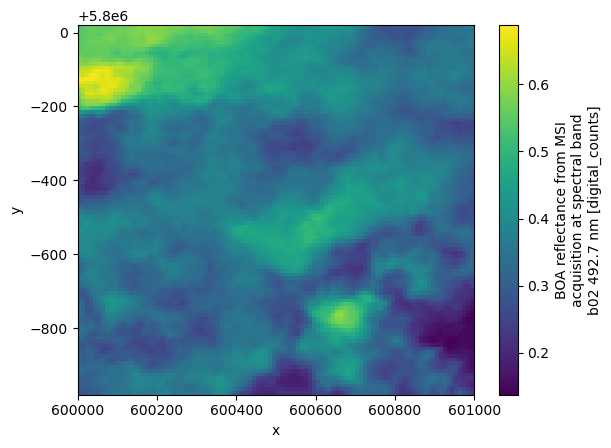

In [11]:
ds_10m.isel(x=slice(0, 100), y=slice(0,100))["b02"].plot()

## Compute NDVI

In [12]:
def validate_scl(scl):
    invalid = [0, 1, 3, 7, 8, 9, 10]  # NO_DATA, SATURATED, CLOUD, etc.
    return ~scl.isin(invalid)


valid_mask = validate_scl(ds_10m["scl"])  # Boolean mask (10980x10980)

## Apply mask per pixel, keep spatial dims

In [13]:
valid_r10m = ds_10m.where(valid_mask)

In [14]:
b04_scl = valid_r10m["b04"]
b08_scl = valid_r10m["b08"]
ndvi = (b08_scl - b04_scl) / (b08_scl + b04_scl)  # Per-pixel NDVI
ndvi

<xarray.DataArray (y: 10980, x: 10980)> Size: 964MB
dask.array<truediv, shape=(10980, 10980), dtype=float64, chunksize=(1830, 1830), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225

## Assign new variables into Xarray Dataset

In [15]:
ds_10m["ndvi"] =  ndvi  # Per-pixel NDVI
ds_10m["b04_scl"] = b04_scl
ds_10m["b08_scl"] = b08_scl
ds_10m["b03_scl"] = valid_r10m["b03"]
ds_10m["b02_scl"] = valid_r10m["b02"]
ds_10m

<xarray.Dataset> Size: 10GB
Dimensions:  (y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
Data variables:
    b02      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b03      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b04      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b08      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    scl      (y, x) float64 964MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    ndvi     (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b04_scl  (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b08_scl  (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b03_scl  (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b02_scl  (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>

## Create RGB image

In [16]:
x_slice = slice(0,100)
y_slice = slice(0,100)

In [17]:
rgb_ds = ds_10m.isel(x=x_slice, y=y_slice)[["b04", "b03", "b02"]]

# Load data into memory (since Dask is lazy)
rgb_ds = rgb_ds.compute()  # Remove this if you want to keep it lazy and plot directly

In [18]:
# Stack bands into (y, x, 3) array for RGB
rgb_array = xr.concat(
    [rgb_ds["b04"], rgb_ds["b03"], rgb_ds["b02"]], 
    dim="rgb"
).transpose("y", "x", "rgb").values

In [19]:
# Clip and stretch for contrast
vmin, vmax = np.percentile(rgb_array, [2, 98])  # 2nd and 98th percentiles
rgb_array = np.clip(rgb_array, vmin, vmax)
rgb_array = (rgb_array - vmin) / (vmax - vmin)  # Scale to 0-1

## Visualize RGB image

Text(0.5, 1.0, 'RGB (Enhanced)')

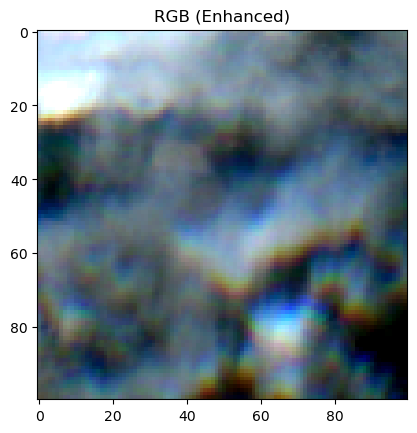

In [20]:
# RGB plot
plt.figure()
plt.imshow( rgb_array)
plt.title(f"RGB (Enhanced)")

```{image} https://eopf-sample-service.github.io/eopf-sample-notebooks/build/e3918518fffbd3f57c89d5a45dc55335.png
:alt: ESA EOPF Zarr Logo
:width: 1000px
:align: center
```